In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import scipy.stats as ss



%matplotlib inline
plt.style.use('seaborn-white')
sns.set(style="whitegrid", palette="colorblind", color_codes=True)


# Lab

In [2]:
boston_df = pd.read_csv("../data/Boston.csv")

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [4]:
est = smf.ols('medv ~ lstat', boston_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 12 Feb 2017   Prob (F-statistic):           5.08e-88
Time:                        13:16:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
lstat         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

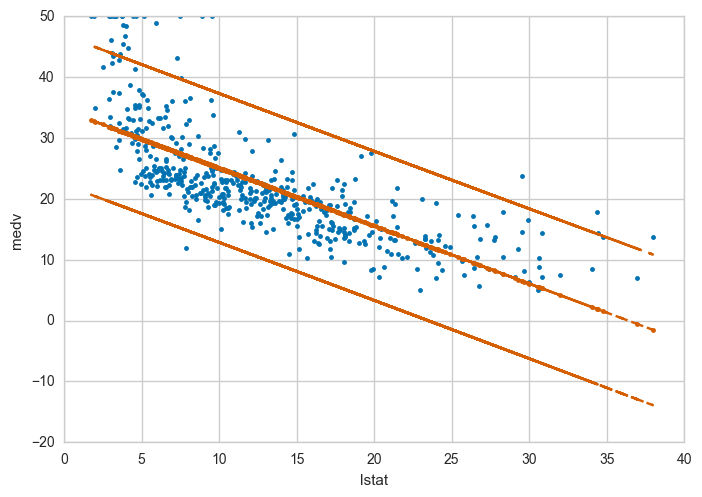

In [5]:
# get prediciton intervals
prstd, iv_l, iv_u = wls_prediction_std(est)

#plot results
plt.plot(boston_df["lstat"], boston_df["medv"],'b.')
plt.plot(boston_df["lstat"], est.fittedvalues, 'r--.')
plt.plot(boston_df["lstat"], iv_u, 'r--')
plt.plot(boston_df["lstat"], iv_l, 'r--')
plt.xlabel("lstat")
plt.ylabel("medv")



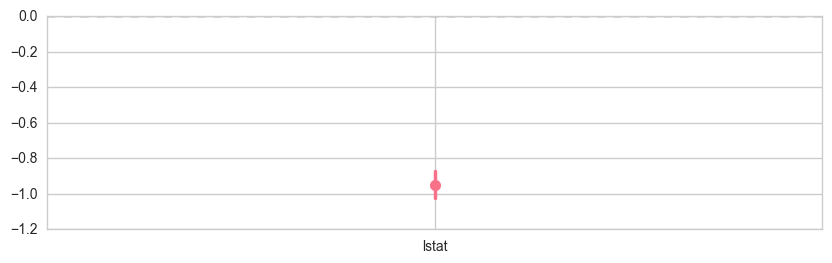

In [6]:
sns.coefplot('medv ~ lstat', boston_df)

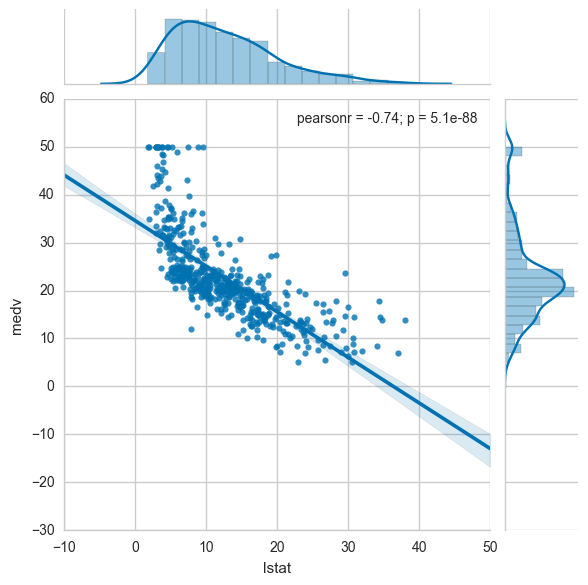

In [7]:
sns.jointplot(x="lstat", y = "medv", data=boston_df, kind="reg")

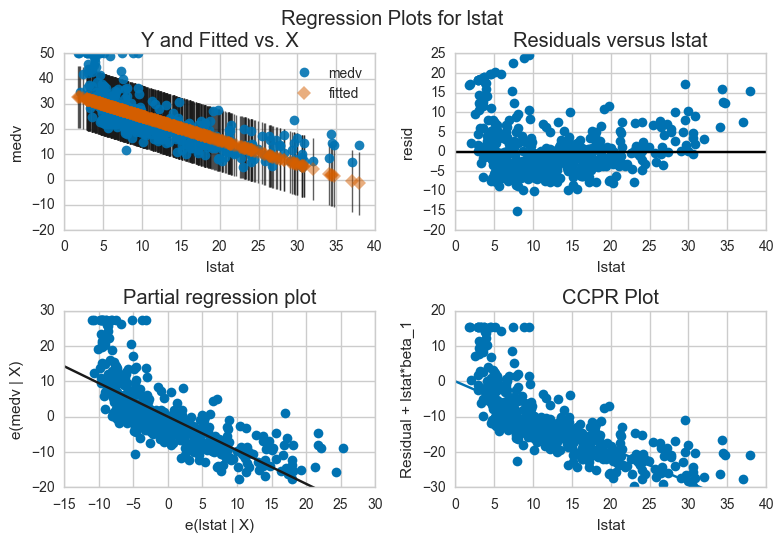

In [64]:
fig = sm.graphics.plot_regress_exog(est, "lstat")


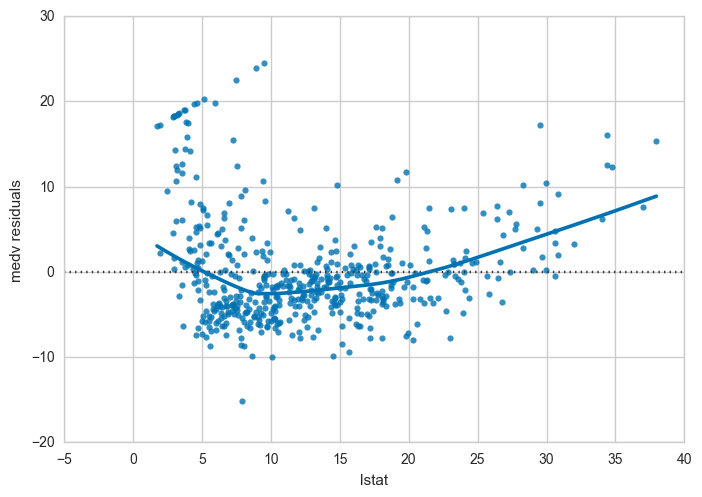

In [24]:
# residual plot of residual vs actual lstat values
sns.residplot(x="lstat", y = "medv", data=boston_df, lowess=True, order=1)
plt.ylabel("medv residuals")
plt.xlabel("actual lstat")

In [ ]:
# calculate residuals
residuals = est.resid


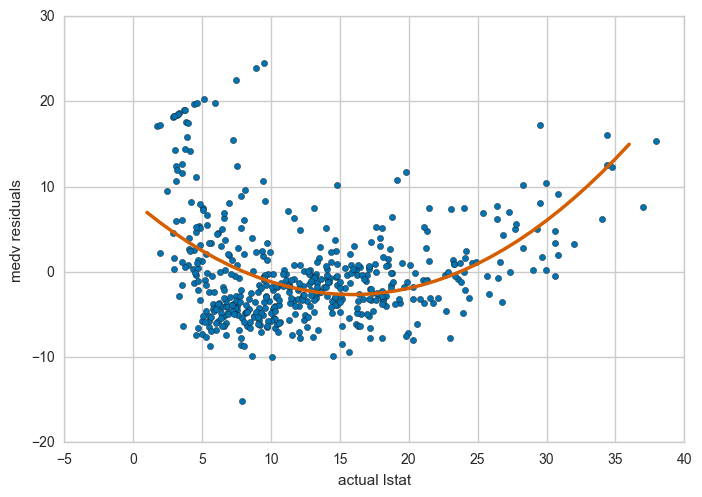

In [50]:
# residual plot of residual vs actual lstat values

plt.scatter(boston_df["lstat"], residuals)
polyline = np.poly1d(np.polyfit(boston_df["lstat"], residuals, 2))    # model non-linearity with quadratic
xs = range(int(np.min(boston_df["lstat"])), int(np.max(boston_df["lstat"])))
plt.plot(xs, polyline(xs), color='r', linewidth=2.5)    
plt.ylabel("medv residuals")
plt.xlabel("actual lstat")

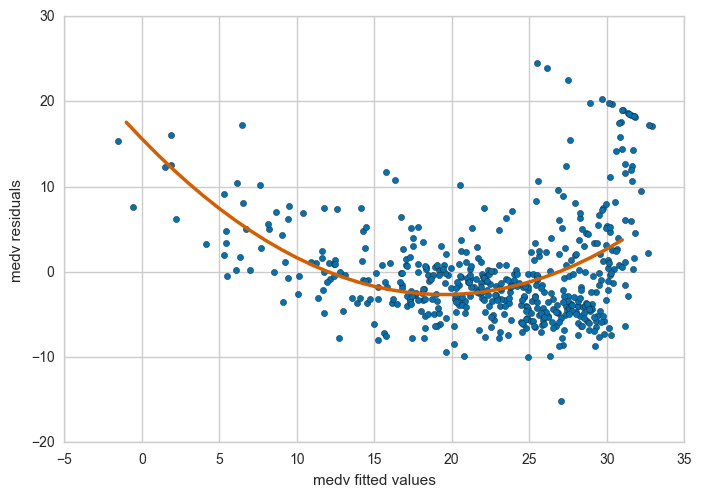

In [57]:
# residual plot of residual vs fitted values(this is what R does)

plt.scatter(est.fittedvalues, residuals)
polyline = np.poly1d(np.polyfit(est.fittedvalues, residuals, 2))    # model non-linearity with quadratic
xs = range(int(np.min(est.fittedvalues)), int(np.max(est.fittedvalues)))
plt.plot(xs, polyline(xs), color='r', linewidth=2.5)    
plt.ylabel("medv residuals")
plt.xlabel("medv fitted values")

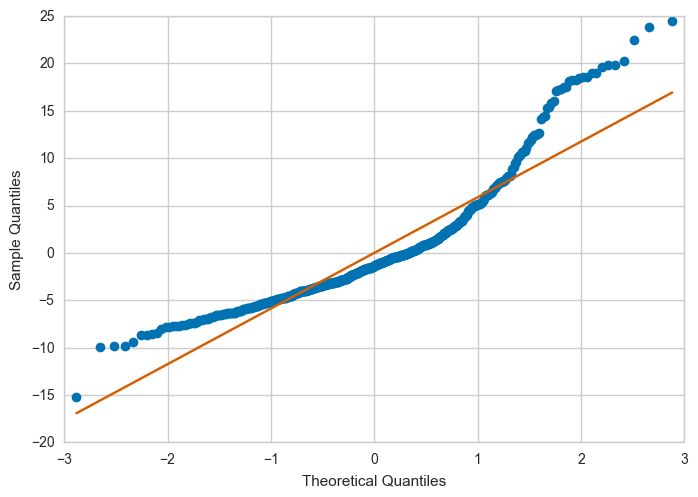

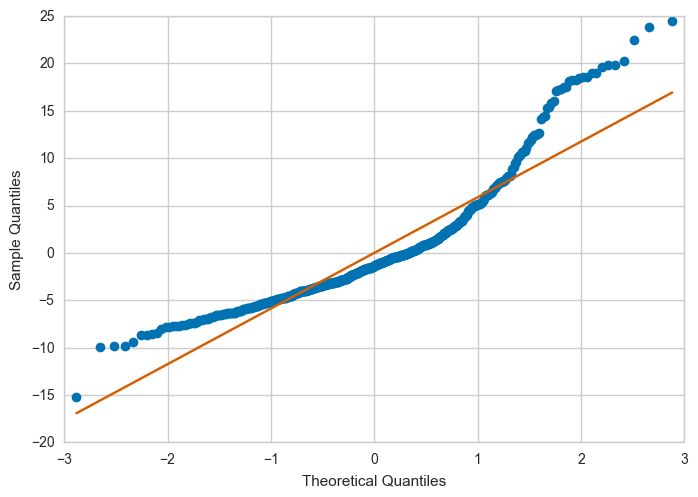

In [12]:
sm.qqplot(residuals, dist="norm", line="r")

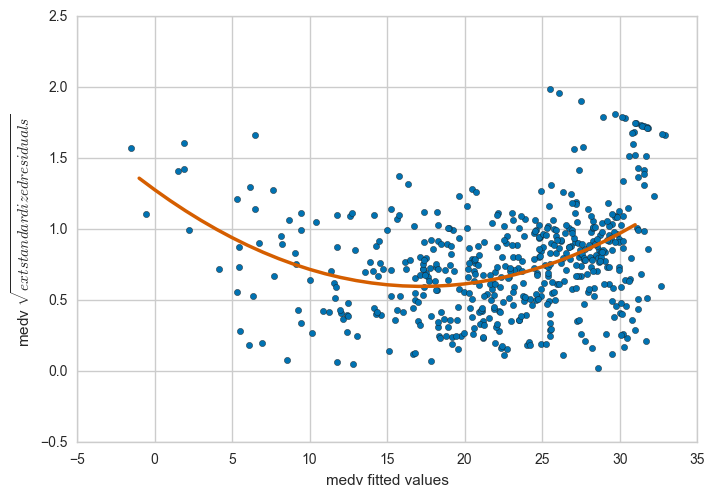

In [60]:
studentized_residuals = ss.zscore(residuals)
sqrt_studentized_residuals = np.sqrt(abs(studentized_residuals))

plt.scatter(est.fittedvalues, sqrt_studentized_residuals)
polyline = np.poly1d(np.polyfit(est.fittedvalues, sqrt_studentized_residuals, 2))    # model non-linearity with quadratic
xs = range(int(np.min(est.fittedvalues)), int(np.max(est.fittedvalues)))
plt.plot(xs, polyline(xs), color='r', linewidth=2.5)    
plt.xlabel("medv fitted values")
plt.ylabel("medv $\sqrt{\text{standardized residuals}}$")

In [98]:
infl = est.get_influence()
infl_summary = infl.summary_frame()

(0, 0.04)

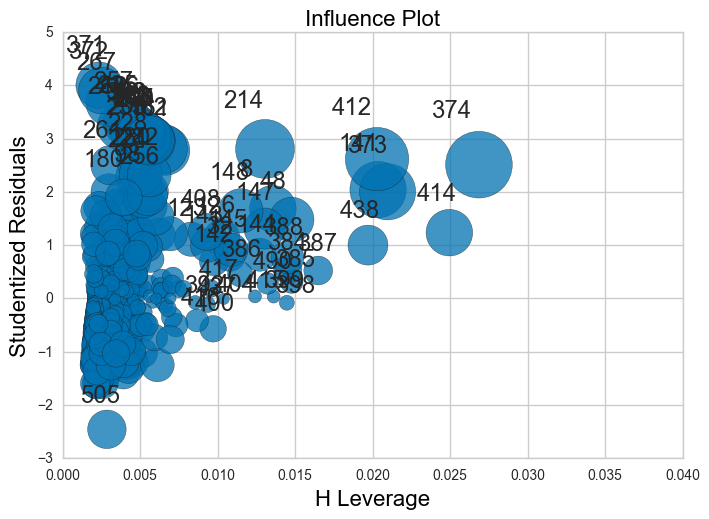

In [49]:
sm.graphics.influence_plot(est, criterion="cooks")
plt.xlim([0,0.04])

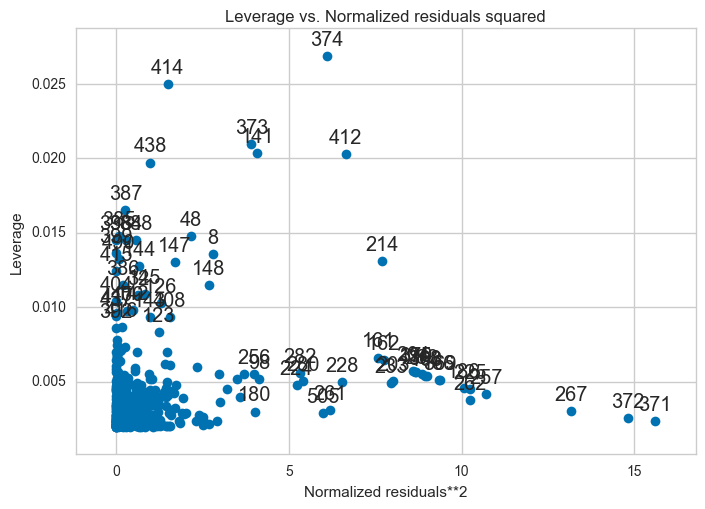

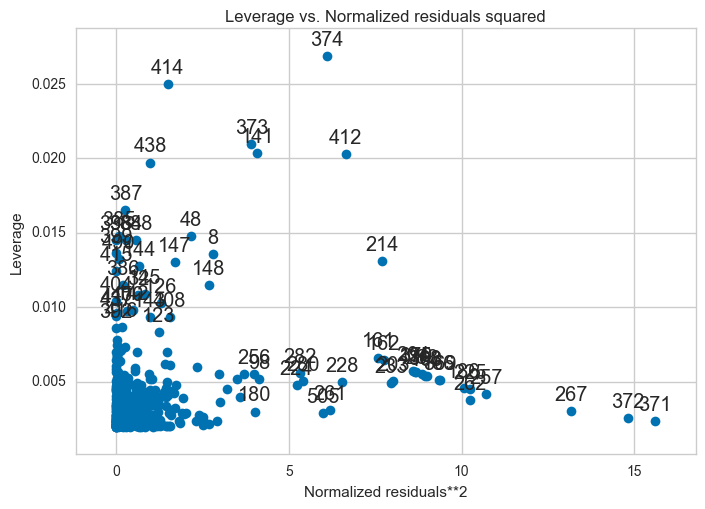

In [65]:
sm.graphics.plot_leverage_resid2(est)


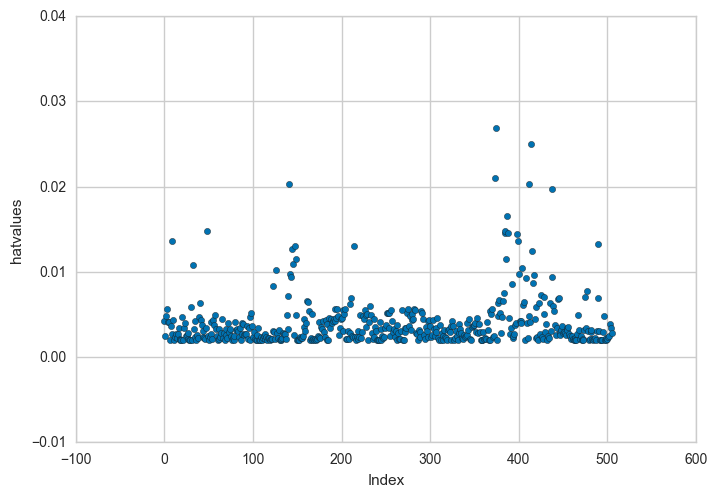

In [101]:
plt.scatter(infl_summary.index, infl_summary["hat_diag"])
plt.xlabel("Index")
plt.ylabel("hatvalues")


In [104]:
# maxium hat value
infl_summary["hat_diag"].idxmax()

374

In [105]:
est = smf.ols('medv ~ lstat + age', boston_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 12 Feb 2017   Prob (F-statistic):           2.98e-88
Time:                        17:29:48   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000        31.787    34.659
lstat         -1.0321      0.048    -21.416      0.000        -1.127    -0.937
age            0.0345      0.012      2.826      0.005         0.011     0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# add all the columns into the features formula except medv
features_formula = "+".join(boston_df.columns - ["medv"])

est = smf.ols('medv ~' + features_formula, boston_df).fit()
est.summary()

/Users/aandrade/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 12 Feb 2017   Prob (F-statistic):          6.72e-135
Time:                        19:11:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000        26.432    46.487
age            0.0007      0.013      0.052      0.958        -0.025     0.027
black          0.0093      0.003      3.467      0.001         0.004     0.015
chas           2.6867      0.862      3.118      0.002         0.994     4.380
crim          -0.1080      0.033     -3.287      0.001        -0.173    -0.043
dis           -1.4756      0.199     -7.398      0.000        -1.867    -1.084
indus          0.0206      0.061      0.334      0.738        -0.100     0.141
lstat         -0.5248      0.051    -10.347      0.000        -0.624    -0.425
nox          -17.7666      3.820     -4.651      0.000       -25.272   -10.262
ptratio       -0.9527      0.131     -7.283      0.000        -1.210    -0.696
rad            0.3060      0.066      4.613      0.000         0.176     0.436
rm             3.8099      0.418      9.116      0.000         2.989     4.631
tax           -0.0123      0.004     -3.280      0.001        -0.020    -0.005
zn             0.0464      0.014      3.382      0.001         0.019     0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

design_matrix = boston_df.as_matrix()

exogenous_idx = boston_df.columns.get_loc("medv")

variance_inflation_factor(design_matrix,exogenous_idx)

24.503206285254794

In [174]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Break into left and right hand side; y and X
y, X = dmatrices('medv ~' + features_formula, boston_df, return_type='dataframe')
# For each Xi, calculate VIF
vif = pd.DataFrame() 
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,vif,features
0,585.265238,Intercept
1,3.100826,age
2,1.348521,black
3,1.073995,chas
4,1.792192,crim
5,3.955945,dis
6,3.991596,indus
7,2.941491,lstat
8,4.393720,nox
9,1.799084,ptratio


In [177]:
features_formula_sans_age = "+".join(boston_df.columns - ["medv","age"])

est = smf.ols('medv ~' + features_formula_sans_age, boston_df).fit()
est.summary()

/Users/aandrade/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sun, 12 Feb 2017   Prob (F-statistic):          6.08e-136
Time:                        21:18:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000        26.456    46.418
black          0.0093      0.003      3.481      0.001         0.004     0.015
chas           2.6890      0.860      3.128      0.002         1.000     4.378
crim          -0.1080      0.033     -3.290      0.001        -0.173    -0.043
dis           -1.4786      0.191     -7.757      0.000        -1.853    -1.104
indus          0.0206      0.061      0.335      0.738        -0.100     0.141
lstat         -0.5239      0.048    -10.999      0.000        -0.617    -0.430
nox          -17.7135      3.679     -4.814      0.000       -24.943   -10.484
ptratio       -0.9522      0.130     -7.308      0.000        -1.208    -0.696
rad            0.3058      0.066      4.627      0.000         0.176     0.436
rm             3.8144      0.408      9.338      0.000         3.012     4.617
tax           -0.0123      0.004     -3.283      0.001        -0.020    -0.005
zn             0.0463      0.014      3.404      0.001         0.020     0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
y, X = dmatrices('medv ~ lstat*age', boston_df, return_type='dataframe')

sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 12 Feb 2017   Prob (F-statistic):           4.86e-88
Time:                        21:45:46   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000        33.201    38.976
lstat         -1.3921      0.167     -8.313      0.000        -1.721    -1.063
age           -0.0007      0.020     -0.036      0.971        -0.040     0.038
lstat:age      0.0042      0.002      2.244      0.025         0.001     0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
est = smf.ols('medv ~ lstat + np.power(lstat,2)', boston_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 12 Feb 2017   Prob (F-statistic):          1.56e-112
Time:                        21:38:08   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000        41.149    44.575
lstat                 -2.3328      0.124    -18.843      0.000        -2.576    -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000         0.036     0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [201]:
from statsmodels.stats.api import anova_lm
est = smf.ols('medv ~ lstat', boston_df).fit()
est2 = smf.ols('medv ~ lstat + np.power(lstat,2)', boston_df).fit()

table2 = anova_lm(est, est2)
table2

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


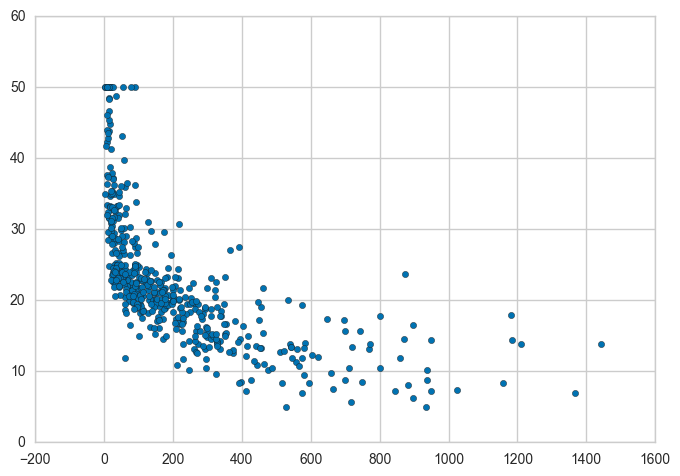

In [205]:
plt.scatter(boston_df["lstat"] ** 2,boston_df["medv"])

In [207]:
residuals = est2.resid

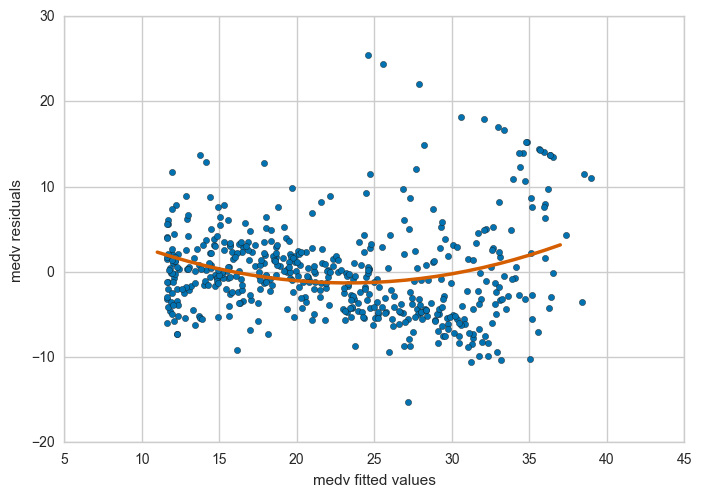

In [216]:
# residual plot of residual vs fitted values(this is what R does)

plt.scatter(est2.fittedvalues, residuals)
polyline = np.poly1d(np.polyfit(est2.fittedvalues, residuals, 2))    # model non-linearity with quadratic
xs = range(int(np.min(est2.fittedvalues)), int(np.max(est2.fittedvalues)))
plt.plot(xs, polyline(xs), color='r', linewidth=2.5)    
plt.ylabel("medv residuals")
plt.xlabel("medv fitted values")

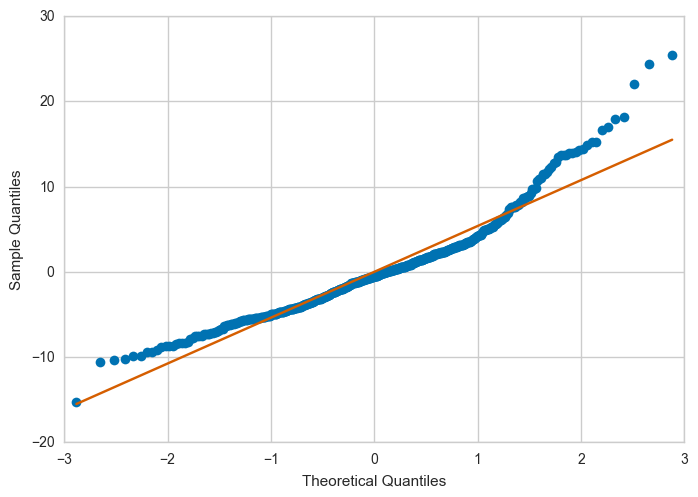

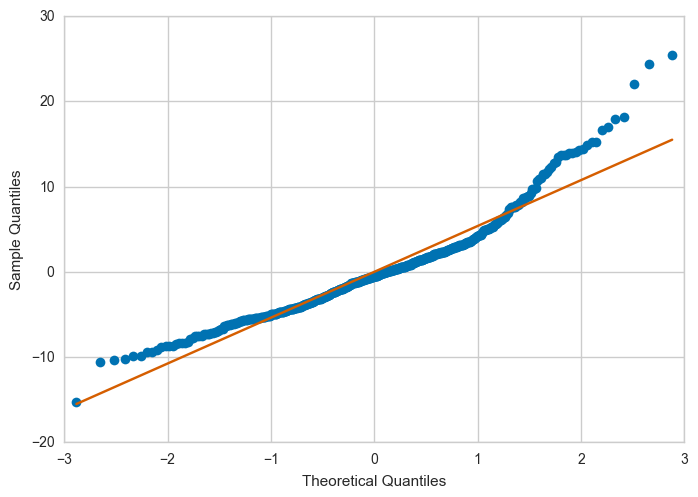

In [208]:
sm.qqplot(residuals, dist="norm", line="r")

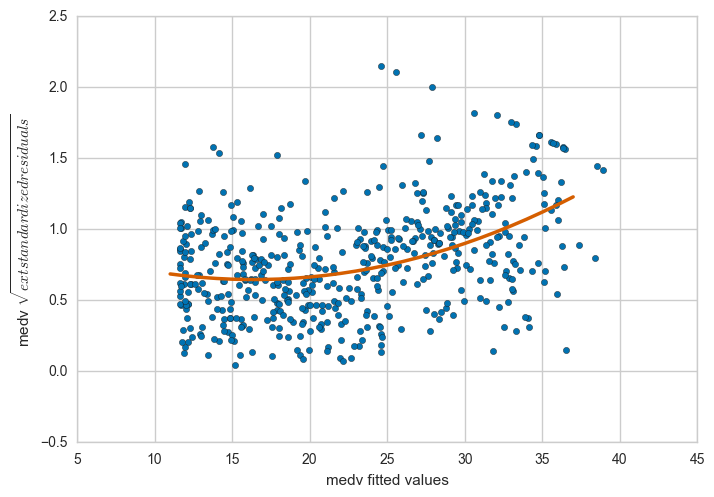

In [218]:
studentized_residuals = ss.zscore(residuals)
sqrt_studentized_residuals = np.sqrt(abs(studentized_residuals))

plt.scatter(est2.fittedvalues, sqrt_studentized_residuals)
polyline = np.poly1d(np.polyfit(est2.fittedvalues, sqrt_studentized_residuals, 2))    # model non-linearity with quadratic
xs = range(int(np.min(est2.fittedvalues)), int(np.max(est2.fittedvalues)))
plt.plot(xs, polyline(xs), color='r', linewidth=2.5)    
plt.xlabel("medv fitted values")
plt.ylabel("medv $\sqrt{\text{standardized residuals}}$")

In [219]:
infl = est2.get_influence()
infl_summary = infl.summary_frame()

(-0.01, 0.15)

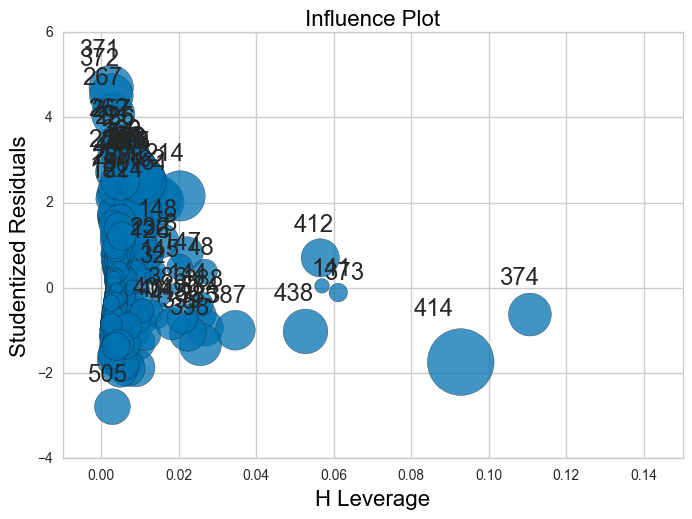

In [224]:
sm.graphics.influence_plot(est2, criterion="cooks")
plt.xlim([-0.01,0.15])

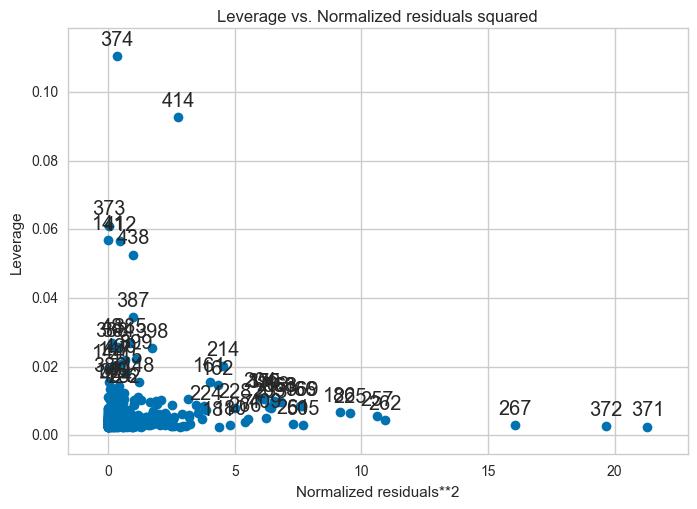

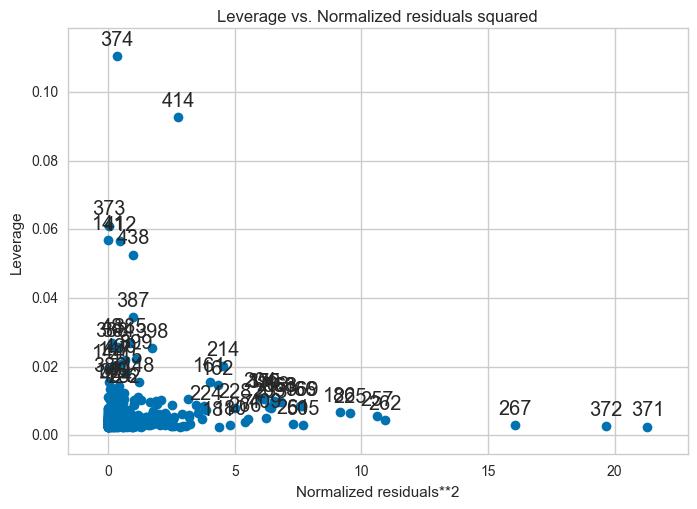

In [225]:
sm.graphics.plot_leverage_resid2(est2)

In [311]:
import pandas.rpy.common as com
infert = com.importr("ISLR")

#load data
carseats_df = com.load_data('Carseats')

In [312]:
carseats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null float64
Income         400 non-null float64
Advertising    400 non-null float64
Population     400 non-null float64
Price          400 non-null float64
ShelveLoc      400 non-null object
Age            400 non-null float64
Education      400 non-null float64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(8), object(3)
memory usage: 37.5+ KB


In [313]:
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138.0,73.0,11.0,276.0,120.0,Bad,42.0,17.0,Yes,Yes
2,11.22,111.0,48.0,16.0,260.0,83.0,Good,65.0,10.0,Yes,Yes
3,10.06,113.0,35.0,10.0,269.0,80.0,Medium,59.0,12.0,Yes,Yes
4,7.40,117.0,100.0,4.0,466.0,97.0,Medium,55.0,14.0,Yes,Yes
5,4.15,141.0,64.0,3.0,340.0,128.0,Bad,38.0,13.0,Yes,No


In [314]:
# add all the columns into the features formula except medv
features_formula = "+".join(carseats_df.columns - ["Sales"])

formula = 'Sales ~' + features_formula + "+ Income:Advertising+Price:Age"
y, X = dmatrices(formula, carseats_df, return_type='dataframe')
# convert non-numeric to factors
carseats_df["ShelveLoc"] = pd.factorize(carseats_df["ShelveLoc"])[0]
carseats_df["Urban"] = pd.factorize(carseats_df["Urban"])[0]
carseats_df["US"] = pd.factorize(carseats_df["US"])[0]sm.OLS(y, X).fit().summary()

/Users/aandrade/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 12 Feb 2017   Prob (F-statistic):          6.14e-166
Time:                        23:25:32   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000         4.592     8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000         4.548     5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000         1.706     2.201
US[T.Yes]              -0.1576      0.149     -1.058      0.291        -0.450     0.135
Urban[T.Yes]            0.1402      0.112      1.247      0.213        -0.081     0.361
Advertising             0.0702      0.023      3.107      0.002         0.026     0.115
Age                    -0.0579      0.016     -3.633      0.000        -0.089    -0.027
CompPrice               0.0929      0.004     22.567      0.000         0.085     0.101
Education              -0.0209      0.020     -1.063      0.288        -0.059     0.018
Income                  0.0109      0.003      4.183      0.000         0.006     0.016
Population              0.0002      0.000      0.433      0.665        -0.001     0.001
Price                  -0.1008      0.007    -13.549      0.000        -0.115    -0.086
Income:Advertising      0.0008      0.000      2.698      0.007         0.000     0.001
Price:Age               0.0001      0.000      0.801      0.424        -0.000     0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [315]:
# convert non-numeric to factors
carseats_df["ShelveLoc"] = pd.factorize(carseats_df["ShelveLoc"])[0]
carseats_df["Urban"] = pd.factorize(carseats_df["Urban"])[0]
carseats_df["US"] = pd.factorize(carseats_df["US"])[0]

# R has a contrasts() function that shows how factors are encoded by default. We can do 
# this manually using scikit-learn's OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

colnames = ["ShelveLoc", "Urban", "US"]
enc = OneHotEncoder()
X = carseats_df[colnames]
enc.fit(X)
X_tr = enc.transform(X).toarray()
colnos = enc.n_values_
colnames_tr = []
for (idx, colname) in enumerate(colnames):
    for i in range(0, colnos[idx]):
        colnames_tr.append(colname + "_" + str(i))
col = 0
for colname_tr in colnames_tr:
    carseats_df[colname_tr] = X_tr[:, col]
    col = col + 1
del carseats_df["ShelveLoc"]
del carseats_df["Urban"]
del carseats_df["US"]
carseats_df[colnames_tr].head()

,ShelveLoc_0,ShelveLoc_1,ShelveLoc_2,Urban_0,Urban_1,US_0,US_1
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
